In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/process_data/weather_stage1_loaded.csv",
    parse_dates=["timestamp"],
)

df.head()


,station_id,timestamp,temp_c,rain_mm,humidity_pct,pressure_hpa,wind_speed_mps,wind_direction_deg,pm25,pm10
0,1,2020-01-01,31.491409,1.0,45.704988,1012.641964,3.114026,166.148254,86.397213,111.814972
1,5,2020-01-01,20.168627,0.0,80.057943,1024.459041,2.940333,328.472986,65.877274,149.232454
2,2,2020-01-01,28.855202,0.5,53.038034,999.104556,2.112275,148.006112,49.146354,116.641144
3,4,2020-01-01,16.405171,0.0,91.966665,1007.644310,1.786636,9.459518,47.964555,182.825386
4,3,2020-01-01,27.285035,0.0,56.622327,1002.424969,3.013912,198.057606,86.614217,103.550101


In [36]:
cols = [
    "temp_c",
    "rain_mm",
    "humidity_pct",
    "pressure_hpa",
    "wind_speed_mps",
    "pm25",
    "pm10",
]

df_weather = df[cols].copy()
df_weather.describe()


,temp_c,rain_mm,humidity_pct,pressure_hpa,wind_speed_mps,pm25,pm10
count,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000
mean,27.005798,0.094649,64.957909,1009.999520,2.503360,60.028063,89.970108
std,4.992958,0.238989,15.001583,4.996531,1.003688,19.993724,30.053351
min,3.083805,0.000000,-3.501162,987.584963,-1.857991,-30.550414,-33.232821
25%,23.647684,0.000000,54.867365,1006.609210,1.827088,46.556391,69.602188
50%,27.017236,0.000000,64.970205,1010.013031,2.503869,59.950780,89.972045
75%,30.370403,0.000000,75.068157,1013.371262,3.177856,73.515683,110.225852
max,48.162096,1.000000,130.720247,1033.106645,7.156243,145.072926,224.750097


In [37]:
corr = df_weather.corr()
corr


,temp_c,rain_mm,humidity_pct,pressure_hpa,wind_speed_mps,pm25,pm10
temp_c,1.000000,0.000234,-0.002428,0.001824,-0.000104,0.002859,-0.000316
rain_mm,0.000234,1.000000,0.001058,0.001803,-0.005259,-0.003107,0.003100
humidity_pct,-0.002428,0.001058,1.000000,0.002641,-0.002932,-0.000774,-0.002148
pressure_hpa,0.001824,0.001803,0.002641,1.000000,-0.002340,0.005258,0.001634
wind_speed_mps,-0.000104,-0.005259,-0.002932,-0.002340,1.000000,0.001088,-0.002141
pm25,0.002859,-0.003107,-0.000774,0.005258,0.001088,1.000000,-0.000625
pm10,-0.000316,0.003100,-0.002148,0.001634,-0.002141,-0.000625,1.000000


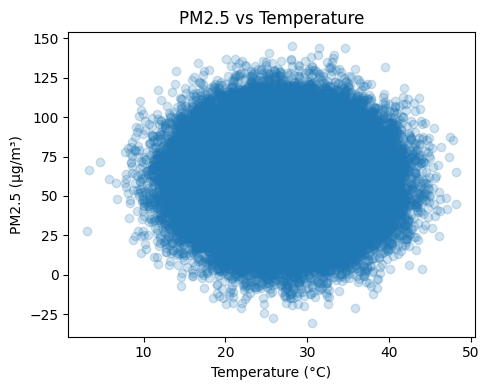

In [38]:
plt.figure(figsize=(5,4))
plt.scatter(df["temp_c"], df["pm25"], alpha=0.2)
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 vs Temperature")
plt.tight_layout()
plt.show()


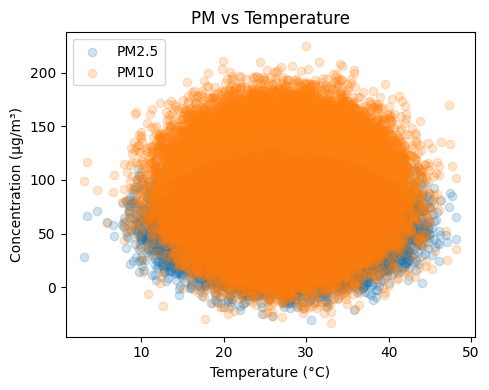

In [39]:
plt.figure(figsize=(5,4))
plt.scatter(df["temp_c"], df["pm25"], alpha=0.2, label="PM2.5")
plt.scatter(df["temp_c"], df["pm10"], alpha=0.2, label="PM10")
plt.xlabel("Temperature (°C)")
plt.ylabel("Concentration (µg/m³)")
plt.title("PM vs Temperature")
plt.legend()
plt.tight_layout()
plt.show()


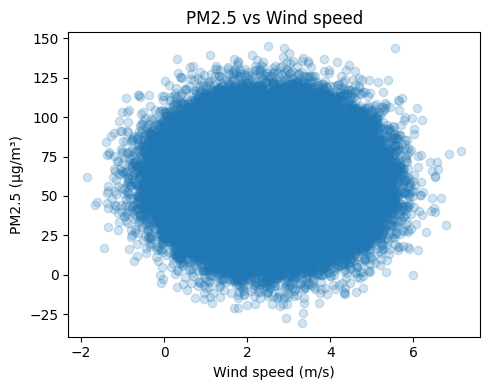

In [40]:
plt.figure(figsize=(5,4))
plt.scatter(df["wind_speed_mps"], df["pm25"], alpha=0.2)
plt.xlabel("Wind speed (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 vs Wind speed")
plt.tight_layout()
plt.show()


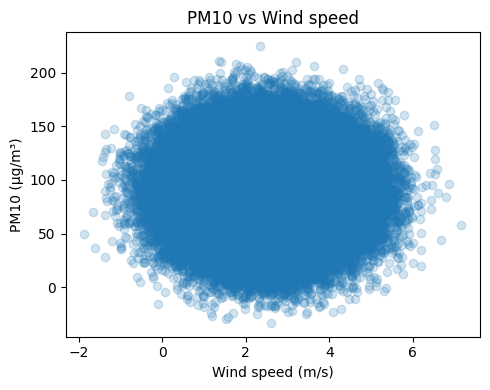

In [41]:
plt.figure(figsize=(5,4))
plt.scatter(df["wind_speed_mps"], df["pm10"], alpha=0.2)
plt.xlabel("Wind speed (m/s)")
plt.ylabel("PM10 (µg/m³)")
plt.title("PM10 vs Wind speed")
plt.tight_layout()
plt.show()

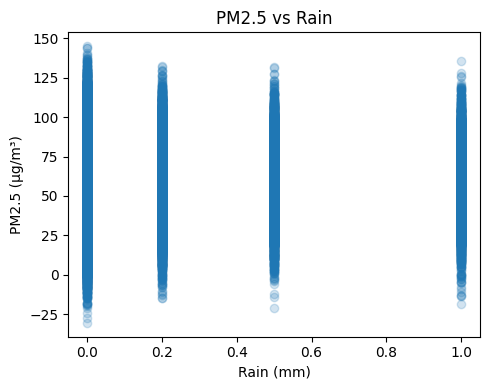

In [42]:
plt.figure(figsize=(5,4))
plt.scatter(df["rain_mm"], df["pm25"], alpha=0.2)
plt.xlabel("Rain (mm)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 vs Rain")
plt.tight_layout()
plt.show()
